# Classification of cell types using a Support Vector Machine algorithm

In [89]:
import pandas as pd
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

## Get the Data
Load ALM data set published by Spidlen J, Shooshtari P, Kollmann TR, Brinkman RR (2011). “Flow cytometry data standards”, BMC Res Notes, 4:50.

In [82]:
label = pd.read_csv('/Users/mwilmes/Documents/coding/MachineLearning/MLB_PengQiu_GT/MLB_gatech/AMLTraining.csv')

In [86]:
label.head()

,FCSFileName,TubeNumber,SampleNumber,Label
0,1,1,1,normal
1,2,2,1,normal
2,3,3,1,normal
3,4,4,1,normal
4,5,5,1,normal


In [85]:
label.iloc[50]

FCSFileName      51
TubeNumber        3
SampleNumber      7
Label           aml
Name: 50, dtype: object

In [12]:
label["Label"].value_counts()

normal    1248
aml        184
Name: Label, dtype: int64

In [13]:
label.tail()

,FCSFileName,TubeNumber,SampleNumber,Label
2867,2868,4,359,NaN
2868,2869,5,359,NaN
2869,2870,6,359,NaN
2870,2871,7,359,NaN
2871,2872,8,359,NaN


In [35]:
dat = label.pivot(index="TubeNumber", columns='SampleNumber', values="FCSFileName")

In [36]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 1 to 8
Columns: 359 entries, 1 to 359
dtypes: int64(359)
memory usage: 22.5 KB


In [37]:
dat.head(8)

SampleNumber,1,2,3,4,5,6,7,8,9,10,...,350,351,352,353,354,355,356,357,358,359
TubeNumber,,,,,,,,,,,,,,,,,,,,,
1,1,9,17,25,33,41,49,57,65,73,...,2793,2801,2809,2817,2825,2833,2841,2849,2857,2865
2,2,10,18,26,34,42,50,58,66,74,...,2794,2802,2810,2818,2826,2834,2842,2850,2858,2866
3,3,11,19,27,35,43,51,59,67,75,...,2795,2803,2811,2819,2827,2835,2843,2851,2859,2867
4,4,12,20,28,36,44,52,60,68,76,...,2796,2804,2812,2820,2828,2836,2844,2852,2860,2868
5,5,13,21,29,37,45,53,61,69,77,...,2797,2805,2813,2821,2829,2837,2845,2853,2861,2869
6,6,14,22,30,38,46,54,62,70,78,...,2798,2806,2814,2822,2830,2838,2846,2854,2862,2870
7,7,15,23,31,39,47,55,63,71,79,...,2799,2807,2815,2823,2831,2839,2847,2855,2863,2871
8,8,16,24,32,40,48,56,64,72,80,...,2800,2808,2816,2824,2832,2840,2848,2856,2864,2872


In [41]:
file1 = pd.read_csv("/Users/mwilmes/Documents/coding/MachineLearning/MLB_PengQiu_GT/MLB_gatech/data/1.CSV")

In [71]:
x = range(1,360)
xx = range(1,9)
outside = [sample for sample in x for i in range(8)]
inside = "1 2 3 4 5 6 7 8".split() * 360

In [72]:
inside[-15:]

['2', '3', '4', '5', '6', '7', '8', '1', '2', '3', '4', '5', '6', '7', '8']

In [73]:
higher_index = list(zip(outside,inside))
higher_index = pd.MultiIndex.from_tuples(higher_index)

In [74]:
higher_index

MultiIndex(levels=[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218

In [77]:
df = pd.DataFrame(np.random.randn(2872,7), index=higher_index, columns=file1.columns)
df.head(15)

FS Lin    SS Log   FL1 Log   FL2 Log   FL3 Log   FL4 Log   FL5 Log
1 1 -0.156480 -0.160009 -0.540813  0.983652  0.342128 -1.175739 -0.262209
  2  1.606546  1.294092 -1.250324 -1.620838  0.338736 -0.517599 -1.439441
  3 -0.381083  1.943637  1.142511  0.520387 -0.524545 -1.636668 -0.159533
  4 -0.435588 -0.636749  0.034366 -1.114818  1.977547 -1.548707  1.527291
  5  0.175232 -0.372455  1.970109  0.694400  0.406635 -0.250762  0.155973
  6 -0.654658  0.060893  0.003722  0.787560 -1.426512  0.896414  0.730070
  7  0.462798  0.733365  1.159676 -0.927595 -0.223048 -2.263564  0.510832
  8 -1.660636  0.252239  0.292368  0.022008 -2.177147 -0.478103 -1.078862
2 1 -1.345262  0.199745  1.211511 -0.937314  0.740254  0.466867  1.398541
  2  0.124499 -0.142697  0.112499  0.743200  0.339591  0.467713 -0.108503
  3 -0.254458  0.668060  0.656105 -0.116690 -0.759092 -0.246860  1.554540
  4  0.194252  0.807530  0.978230  2.562637  0.395065 -0.540439  0.590372
  5  0.417085 -2.174093 -0.311668 -0.689402  0.844855 -1.103450 -0.163985
  6  0.667921 -0.900151  1.356063 -0.580258  1.504438  0.625434  0.847581
  7 -0.929431 -0.273420  0.437755 -1.576528  1.162207 -0.453991 -0.021570

In [78]:
df.index.names = ['Sample','Tube']

In [79]:
df.head(15)

FS Lin    SS Log   FL1 Log   FL2 Log   FL3 Log   FL4 Log  \
Sample Tube                                                               
1      1    -0.156480 -0.160009 -0.540813  0.983652  0.342128 -1.175739   
       2     1.606546  1.294092 -1.250324 -1.620838  0.338736 -0.517599   
       3    -0.381083  1.943637  1.142511  0.520387 -0.524545 -1.636668   
       4    -0.435588 -0.636749  0.034366 -1.114818  1.977547 -1.548707   
       5     0.175232 -0.372455  1.970109  0.694400  0.406635 -0.250762   
       6    -0.654658  0.060893  0.003722  0.787560 -1.426512  0.896414   
       7     0.462798  0.733365  1.159676 -0.927595 -0.223048 -2.263564   
       8    -1.660636  0.252239  0.292368  0.022008 -2.177147 -0.478103   
2      1    -1.345262  0.199745  1.211511 -0.937314  0.740254  0.466867   
       2     0.124499 -0.142697  0.112499  0.743200  0.339591  0.467713   
       3    -0.254458  0.668060  0.656105 -0.116690 -0.759092 -0.246860   
       4     0.194252  0.807530  0.978230  2.562637  0.395065 -0.540439   
       5     0.417085 -2.174093 -0.311668 -0.689402  0.844855 -1.103450   
       6     0.667921 -0.900151  1.356063 -0.580258  1.504438  0.625434   
       7    -0.929431 -0.273420  0.437755 -1.576528  1.162207 -0.453991   

              FL5 Log  
Sample Tube            
1      1    -0.262209  
       2    -1.439441  
       3    -0.159533  
       4     1.527291  
       5     0.155973  
       6     0.730070  
       7     0.510832  
       8    -1.078862  
2      1     1.398541  
       2    -0.108503  
       3     1.554540  
       4     0.590372  
       5    -0.163985  
       6     0.847581  
       7    -0.021570

In [80]:
file1.describe()

,FS Lin,SS Log,FL1 Log,FL2 Log,FL3 Log,FL4 Log,FL5 Log
count,26966.000000,26966.000000,26966.000000,26966.000000,26966.000000,26966.000000,26966.000000
mean,663.982311,0.554379,0.205182,0.202277,0.589269,0.181832,0.161980
std,218.849759,0.095017,0.052198,0.048688,0.107338,0.043249,0.026069
min,150.000000,0.219672,0.140279,0.140279,0.140279,0.140279,0.140279
25%,464.000000,0.451106,0.144425,0.157195,0.546297,0.140279,0.140279
50%,713.000000,0.602538,0.211116,0.201595,0.606085,0.172787,0.153350
75%,848.000000,0.629090,0.240654,0.237166,0.663450,0.208861,0.177072
max,1022.000000,0.767618,0.586544,0.576743,0.859109,0.501908,0.435142


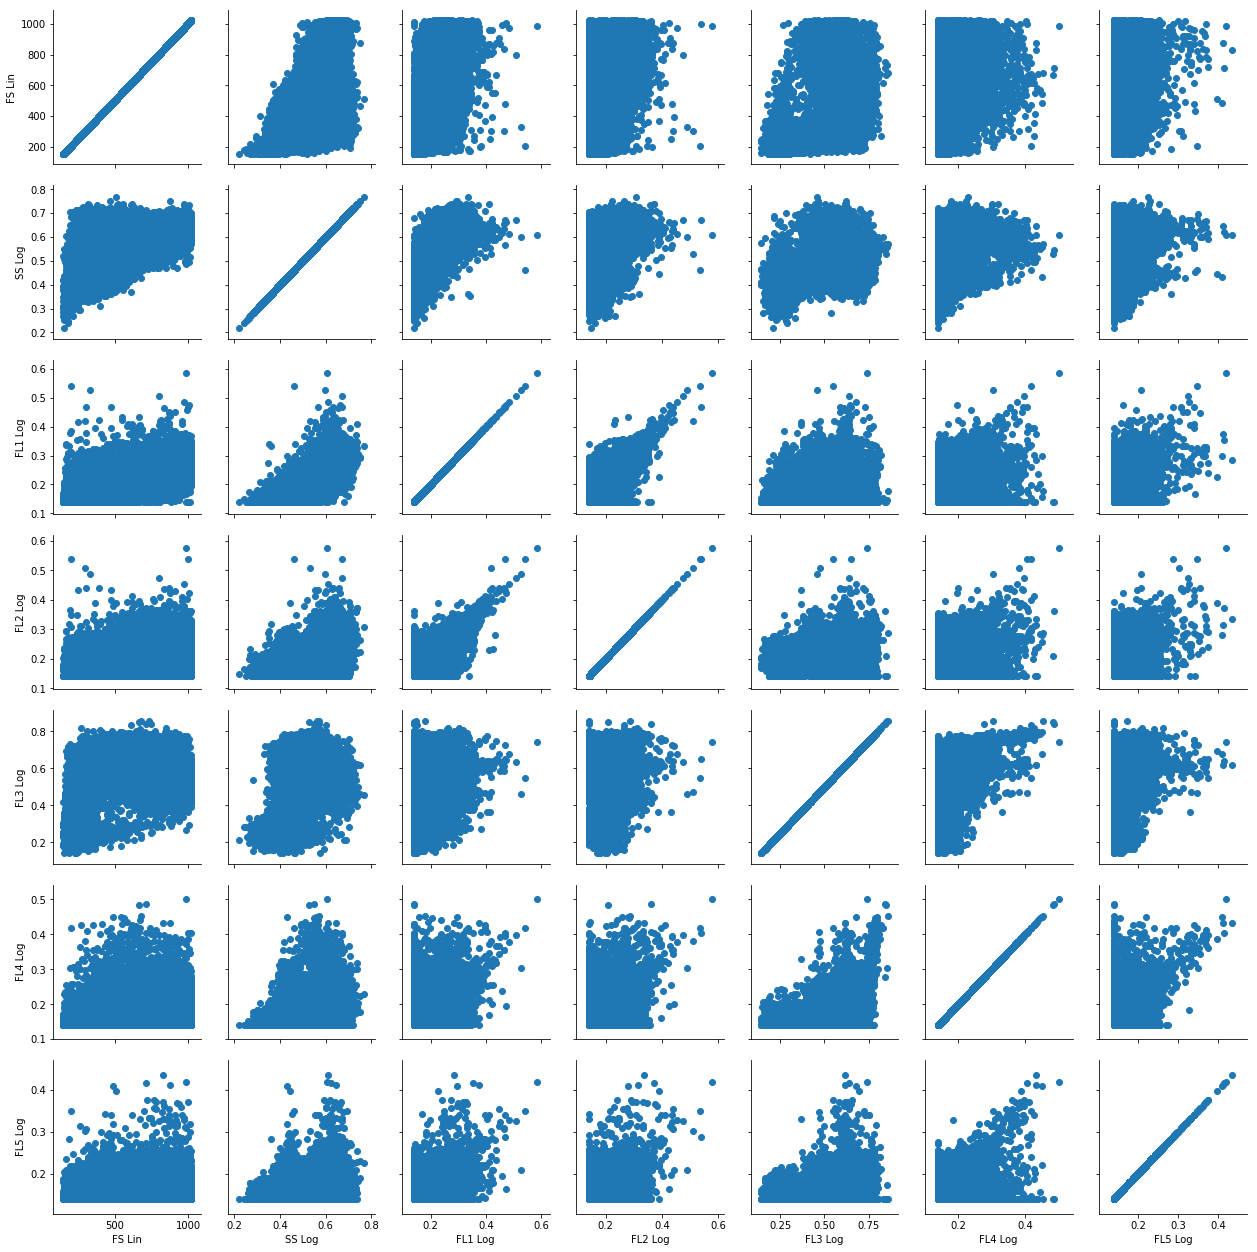

In [3]:
g = sns.PairGrid(file1)
g.map(plt.scatter)

In [5]:
file1.median(axis=0)

FS Lin     713.000000
SS Log       0.602538
FL1 Log      0.211116
FL2 Log      0.201595
FL3 Log      0.606085
FL4 Log      0.172787
FL5 Log      0.153350
dtype: float64

In [87]:
file1 = pd.read_csv("/Users/mwilmes/Documents/coding/MachineLearning/MLB_PengQiu_GT/MLB_gatech/data/1.CSV")

In [88]:
file50.median()

FS Lin     482.000000
SS Log       0.575851
FL1 Log      0.505559
FL2 Log      0.557967
FL3 Log      0.620252
FL4 Log      0.183968
FL5 Log      0.177072
dtype: float64

In [113]:
directory = "/Users/mwilmes/Documents/coding/MachineLearning/MLB_PengQiu_GT/MLB_gatech/data/"

In [114]:
line = 0
for filename in os.listdir(directory):
    if filename.endswith(".CSV"): 
        temp = pd.read_csv(os.path.join(directory, filename))
        df.iloc[line] = temp.median()
        line += 1 

In [115]:
df.head(20)

FS Lin    SS Log   FL1 Log   FL2 Log   FL3 Log   FL4 Log  \
Sample Tube                                                             
1      1      713.0  0.602538  0.211116  0.201595  0.606085  0.172787   
       2      593.0  0.575851  0.396050  0.397976  0.565130  0.154471   
       3      734.0  0.601651  0.632621  0.550790  0.623789  0.601651   
       4      771.0  0.624672  0.327528  0.295029  0.282397  0.179307   
       5      557.0  0.565130  0.318636  0.307787  0.679262  0.203017   
       6      574.0  0.567813  0.422839  0.446425  0.679262  0.198798   
       7      583.0  0.568707  0.376671  0.332469  0.678384  0.210360   
       8      542.0  0.557071  0.504646  0.554380  0.674873  0.539996   
2      1      557.0  0.563341  0.330493  0.490006  0.677507  0.244186   
       2      552.0  0.562446  0.324564  0.309757  0.677507  0.194724   
       3      551.0  0.563341  0.356127  0.310742  0.673116  0.231177   
       4      575.0  0.567813  0.323575  0.287236  0.245075  0.183968   
       5      372.0  0.447362  0.214950  0.201595  0.599876  0.155234   
       6      742.0  0.603425  0.309757  0.511934  0.622021  0.183968   
       7      377.0  0.448299  0.270905  0.270905  0.610516  0.149808   
       8      371.0  0.447362  0.353178  0.226166  0.599876  0.164025   
3      1      369.0  0.446425  0.208861  0.256864  0.601651  0.171754   
       2      376.0  0.449235  0.213405  0.238034  0.613173  0.157597   
       3      373.0  0.448299  0.231177  0.214176  0.605199  0.152257   
       4      367.0  0.447362  0.239778  0.204454  0.594547  0.174365   

              FL5 Log  
Sample Tube            
1      1     0.153350  
       2     0.175436  
       3     0.164940  
       4     0.167773  
       5     0.154471  
       6     0.166814  
       7     0.164025  
       8     0.140279  
2      1     0.246862  
       2     0.291126  
       3     0.254109  
       4     0.160077  
       5     0.148801  
       6     0.267122  
       7     0.156401  
       8     0.171243  
3      1     0.166340  
       2     0.164025  
       3     0.279506  
       4     0.147179

/Users/mwilmes/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


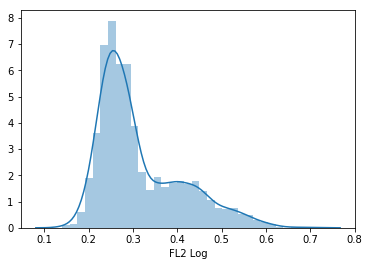

In [124]:
sns.distplot(df["FL2 Log"])

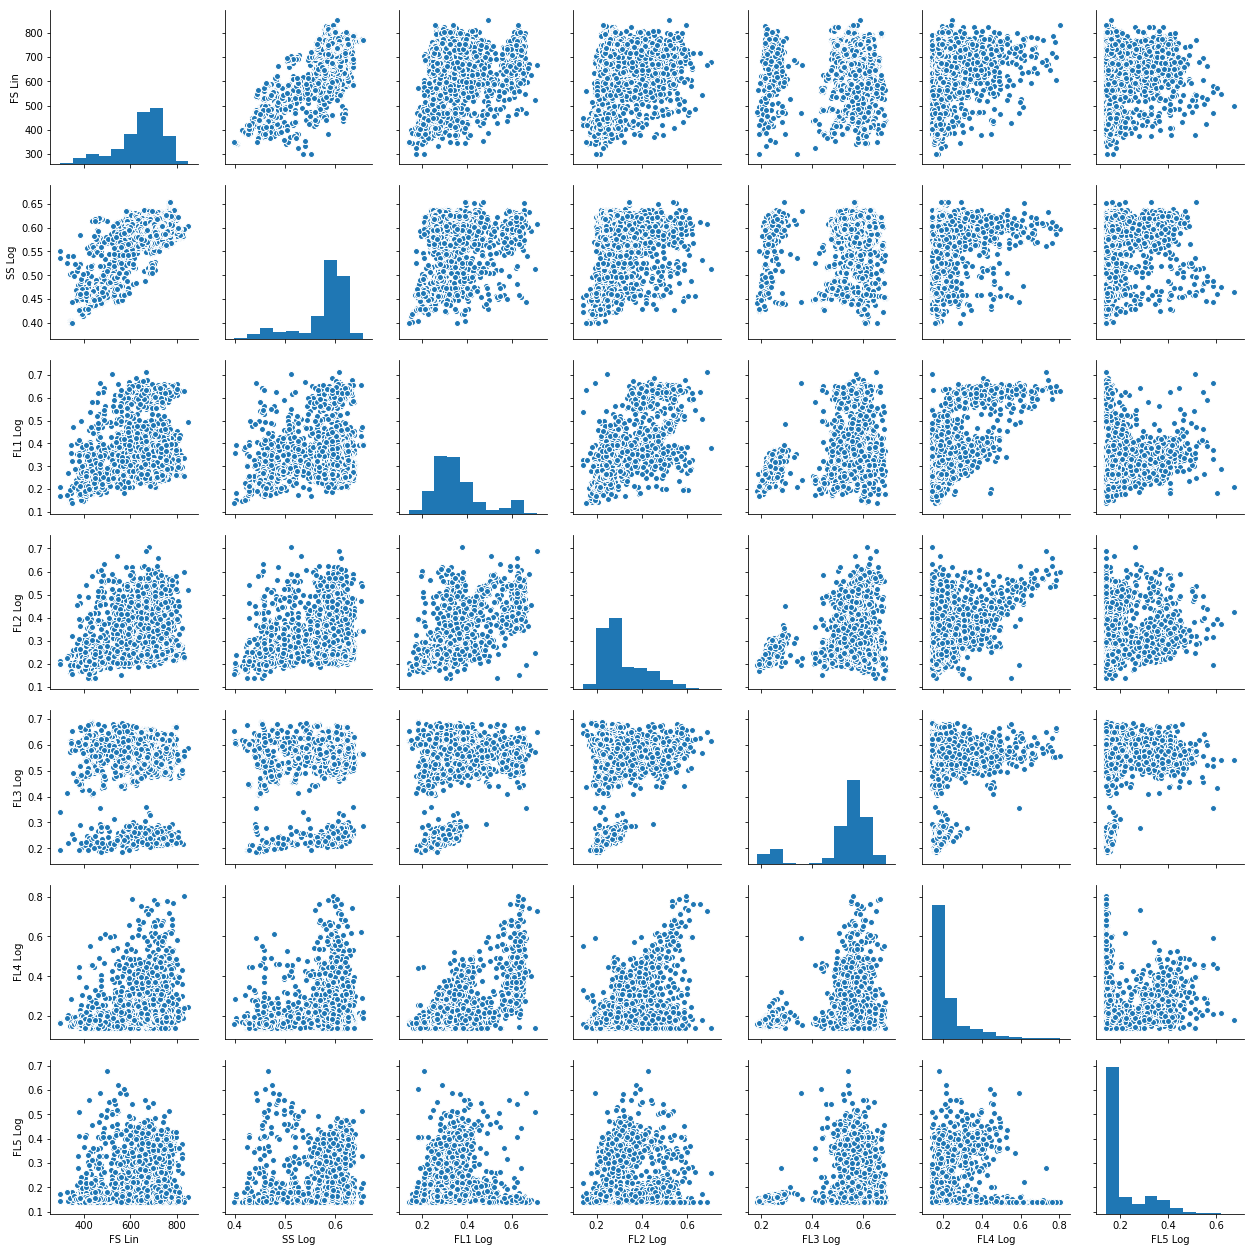

In [126]:
sns.pairplot(df)